# Imports

In [21]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

# Prepare the Dataset

In [22]:
def map_image(image,label):
  image = tf.cast(image,dtype = tf.float32)
  image = image / 255.0
  image = tf.reshape(image,shape = (784,))

  return image,image

In [23]:
# Load the train and test sets from TFDS
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 1024

train_dataset = tfds.load('mnist',as_supervised = True,split = 'train')
train_dataset = train_dataset.map(map_image)
train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).repeat()

test_dataset = tfds.load('mnist',as_supervised = True,split = 'test')
test_dataset = test_dataset.map(map_image)
# repeat() function is used to repeat the elements of a dataset.
# repeat() then makes the batched dataset repeat indefinitely.
# it ensures that the dataset provides a continuous stream of data without running out.
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

# Build the Model

In [24]:
def simple_autoencoder(inputs):
  encoder = tf.keras.layers.Dense(units = 32,activation = 'relu')(inputs)
  decoder = tf.keras.layers.Dense(units = 784,activation = 'sigmoid')(encoder)

  return encoder,decoder

# Set the input shape
inputs = tf.keras.layers.Input(shape = (784,))

# Get the encoder and decoder output
encoder_output,decoder_output = simple_autoencoder(inputs)

# Setup the encoder because will visualize its output later
encoder_model = tf.keras.Model(inputs = inputs,outputs = encoder_output)

# Setup the autoencoder
autoencoder_model = tf.keras.Model(inputs = inputs,outputs = decoder_output)

# Compile the Model

In [25]:
autoencoder_model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'binary_crossentropy'
)

# Train the Model

In [26]:
train_steps = 60000 // BATCH_SIZE
simple_auto_history = autoencoder_model.fit(train_dataset,
                                             steps_per_epoch = train_steps,
                                             epochs = 50)

Epoch 1/50
468/468 [==============================] - 10s 21ms/step - loss: 0.2290
Epoch 2/50
468/468 [==============================] - 5s 11ms/step - loss: 0.1436
Epoch 3/50
468/468 [==============================] - 5s 11ms/step - loss: 0.1190
Epoch 4/50
468/468 [==============================] - 7s 15ms/step - loss: 0.1065
Epoch 5/50
468/468 [==============================] - 6s 12ms/step - loss: 0.1000
Epoch 6/50
468/468 [==============================] - 8s 18ms/step - loss: 0.0968
Epoch 7/50
468/468 [==============================] - 5s 11ms/step - loss: 0.0953
Epoch 8/50
468/468 [==============================] - 6s 13ms/step - loss: 0.0946
Epoch 9/50
468/468 [==============================] - 6s 13ms/step - loss: 0.0942
Epoch 10/50
468/468 [==============================] - 5s 10ms/step - loss: 0.0939
Epoch 11/50
468/468 [==============================] - 7s 15ms/step - loss: 0.0937
Epoch 12/50
468/468 [==============================] - 5s 11ms/step - loss: 0.0936
Epoch 13/50


# Display sample results

In [29]:
def display_one_row(disp_images,offset,shape = (28,28)):
  for idx,test_image in enumerate(disp_images):
    plt.subplot(3,10,offset + idx +  1)
    plt.xticks([])
    plt.yticks([])
    test_image = np.reshape(test_image,shape)
    plt.imshow(test_image,cmap = 'gray')

def display_results(disp_input_images,disp_encoded,disp_predicted,enc_shape = (8,4)):
  plt.figure(figsize = (15,5))
  display_one_row(disp_input_images,0,shape = (28,28,))
  display_one_row(disp_encoded,10,shape = enc_shape)
  display_one_row(disp_predicted,20,shape = (28,28,))

1/1 [==============================] - 0s 80ms/step


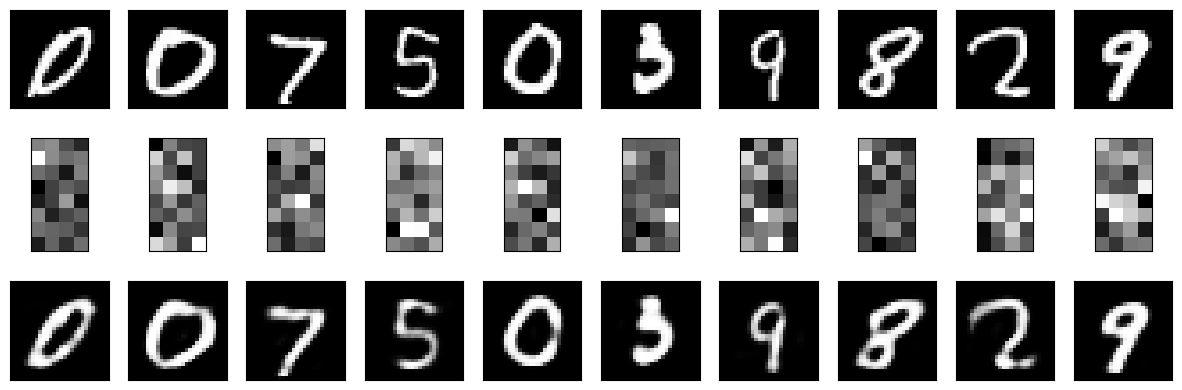

In [30]:
# Take 1 batch of the dataset
test_dataset = test_dataset.take(1)

# Take the input images and put them in a list
output_samples = []
for input_image,image in tfds.as_numpy(test_dataset):
  output_samples = input_image

# picks 10 random numbers to be used as indices to the list above
idxs = np.random.choice(BATCH_SIZE,size = 10)

# Get the encoder output
encoded_predicted = encoder_model.predict(test_dataset)

# Get a prediction for the test batch
simple_predicted = autoencoder_model.predict(test_dataset)

# Display the 10 samples, encodings and decoded values
display_results(output_samples[idxs],encoded_predicted[idxs],simple_predicted[idxs])